In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
#read csv file
df_main = pd.read_csv('top_10_percent_answers.csv')

#drop columns
df_main.drop(['percentage'], axis=1, inplace=True)
df_main.head()


,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness
0,Housewife,-1,-1,1-14 days,0,0,-1,-1,-1,-1
1,Housewife,1,1,1-14 days,0,0,-1,-1,-1,-1
2,Student,-1,-1,More than 2 months,0,-1,0,1,1,-1
3,Corporate,-1,-1,31-60 days,0,-1,0,-1,-1,1
4,Corporate,-1,-1,31-60 days,1,0,1,-1,-1,0


In [23]:
#look for correlation between variables
from itertools import combinations
from scipy.stats import chi2_contingency

# # Generate all pairs of variables
# variable_pairs = list(combinations(df_main.columns, 2))
# for var1, var2 in variable_pairs:
#     contingency_table = pd.crosstab(df_main[var1], df_main[var2])
#     print(f"Contingency Table for {var1} and {var2}:\n{contingency_table}\n")


# Generate all pairs of variables
variable_pairs = list(combinations(df_main.columns, 2))

# Perform Chi-Square test for each pair and store the results
chi_square_results = []

for var1, var2 in variable_pairs:
    contingency_table = pd.crosstab(df_main[var1], df_main[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results.append({'Variable Pair': f'{var1} - {var2}', 'Chi2': chi2, 'p-value': p})

# Convert results to DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Sort by p-value
chi_square_results_df = chi_square_results_df.sort_values(by='p-value')


#save results to csv
chi_square_results_df.to_csv('chi_square_results.csv')


#take top 100 results
chi_square_top_df = chi_square_results_df.head(100)

#sort by chi2
chi_square_sorted_df = chi_square_top_df.sort_values(by='Chi2', ascending=False)

# Display the results
chi_square_sorted_df.head(30)

,Variable Pair,Chi2,p-value
2,occupation - days_indoors,28.083408,0.030902
29,days_indoors - social_weakness,19.268305,0.013489
7,occupation - work_interest,14.939682,0.060329
9,family_history - treatment,12.748911,0.000356
24,days_indoors - growing_stress,10.954785,0.204274
26,days_indoors - mood_swings,9.763940,0.281987
17,treatment - days_indoors,9.439599,0.051003
28,days_indoors - work_interest,6.623542,0.577739
34,growing_stress - social_weakness,6.525295,0.163204
5,occupation - mood_swings,5.996142,0.647664


In [24]:

# df_extended = df_main.copy()

# # Include only columns candidacy rating, treatment, family_history, and social_weakness
# df_extended = df_extended[['candidacy_rating', 'treatment', 'family_history', 'social_weakness']]

# # Pair plot
# sns.pairplot(df_extended)
# plt.suptitle('Pair Plot for Multiple Variables')
# plt.subplots_adjust(top=0.95)
# plt.show()

# sns.countplot(data=df_extended, x='treatment')

# sns.boxplot(data=df_extended, x='treatment', y='candidacy_rating')
# plt.title('Box Plot of Candidacy Rating by Treatment')
# plt.show()

# g = sns.FacetGrid(df_extended, col='treatment', row='family_history')
# g.map(sns.histplot, 'candidacy_rating')
# plt.show()

In [25]:
#value counts names in column Days_Indoors
df_main['days_indoors'].value_counts()

frequency_distribution = df_main['days_indoors'].value_counts().reset_index()
frequency_distribution.columns = ['days_indoors', 'family_history']

print(frequency_distribution)


         days_indoors  family_history
0    Go out Every day              33
1          31-60 days              26
2  More than 2 months              24
3           1-14 days              19
4          15-30 days               5


In [26]:
# # Clean the 'gender' column
# df_main['gender'] = df_main['gender'].str.strip().str.lower()

# # Check unique values after cleaning
# print("\nUnique values in 'gender' column after cleaning:")
# print(df_main['gender'].unique())


# # Convert 'Gender' to numeric for correlation purposes
# df_main['gender'] = df_main['gender'].map({'male': 1, 'female': 0})


Numeric DataFrame:
   family_history  treatment  growing_stress  mental_health_history  \
0              -1         -1               0                      0   
1               1          1               0                      0   
2              -1         -1               0                     -1   
3              -1         -1               0                     -1   
4              -1         -1               1                      0   

   mood_swings  coping_struggles  work_interest  social_weakness  
0           -1                -1             -1               -1  
1           -1                -1             -1               -1  
2            0                 1              1               -1  
3            0                -1             -1                1  
4            1                -1             -1                0  

Correlation Matrix:
                       family_history  treatment  growing_stress  \
family_history               1.000000   0.703763        0.01446

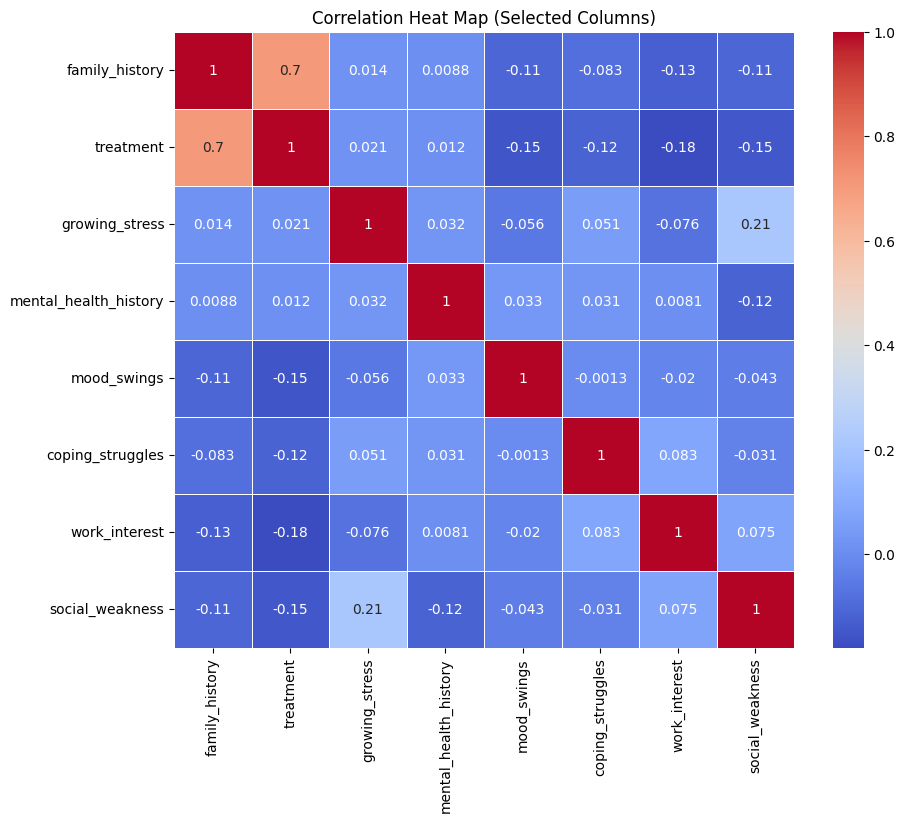

In [37]:
# Create a copy of the DataFrame
df_cor = df_main.copy()

# Remove non-numeric columns
df_cor = df_cor.select_dtypes(include=[float, int])

# Display the first few rows of the numeric DataFrame
print("Numeric DataFrame:")
print(df_cor.head())

# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

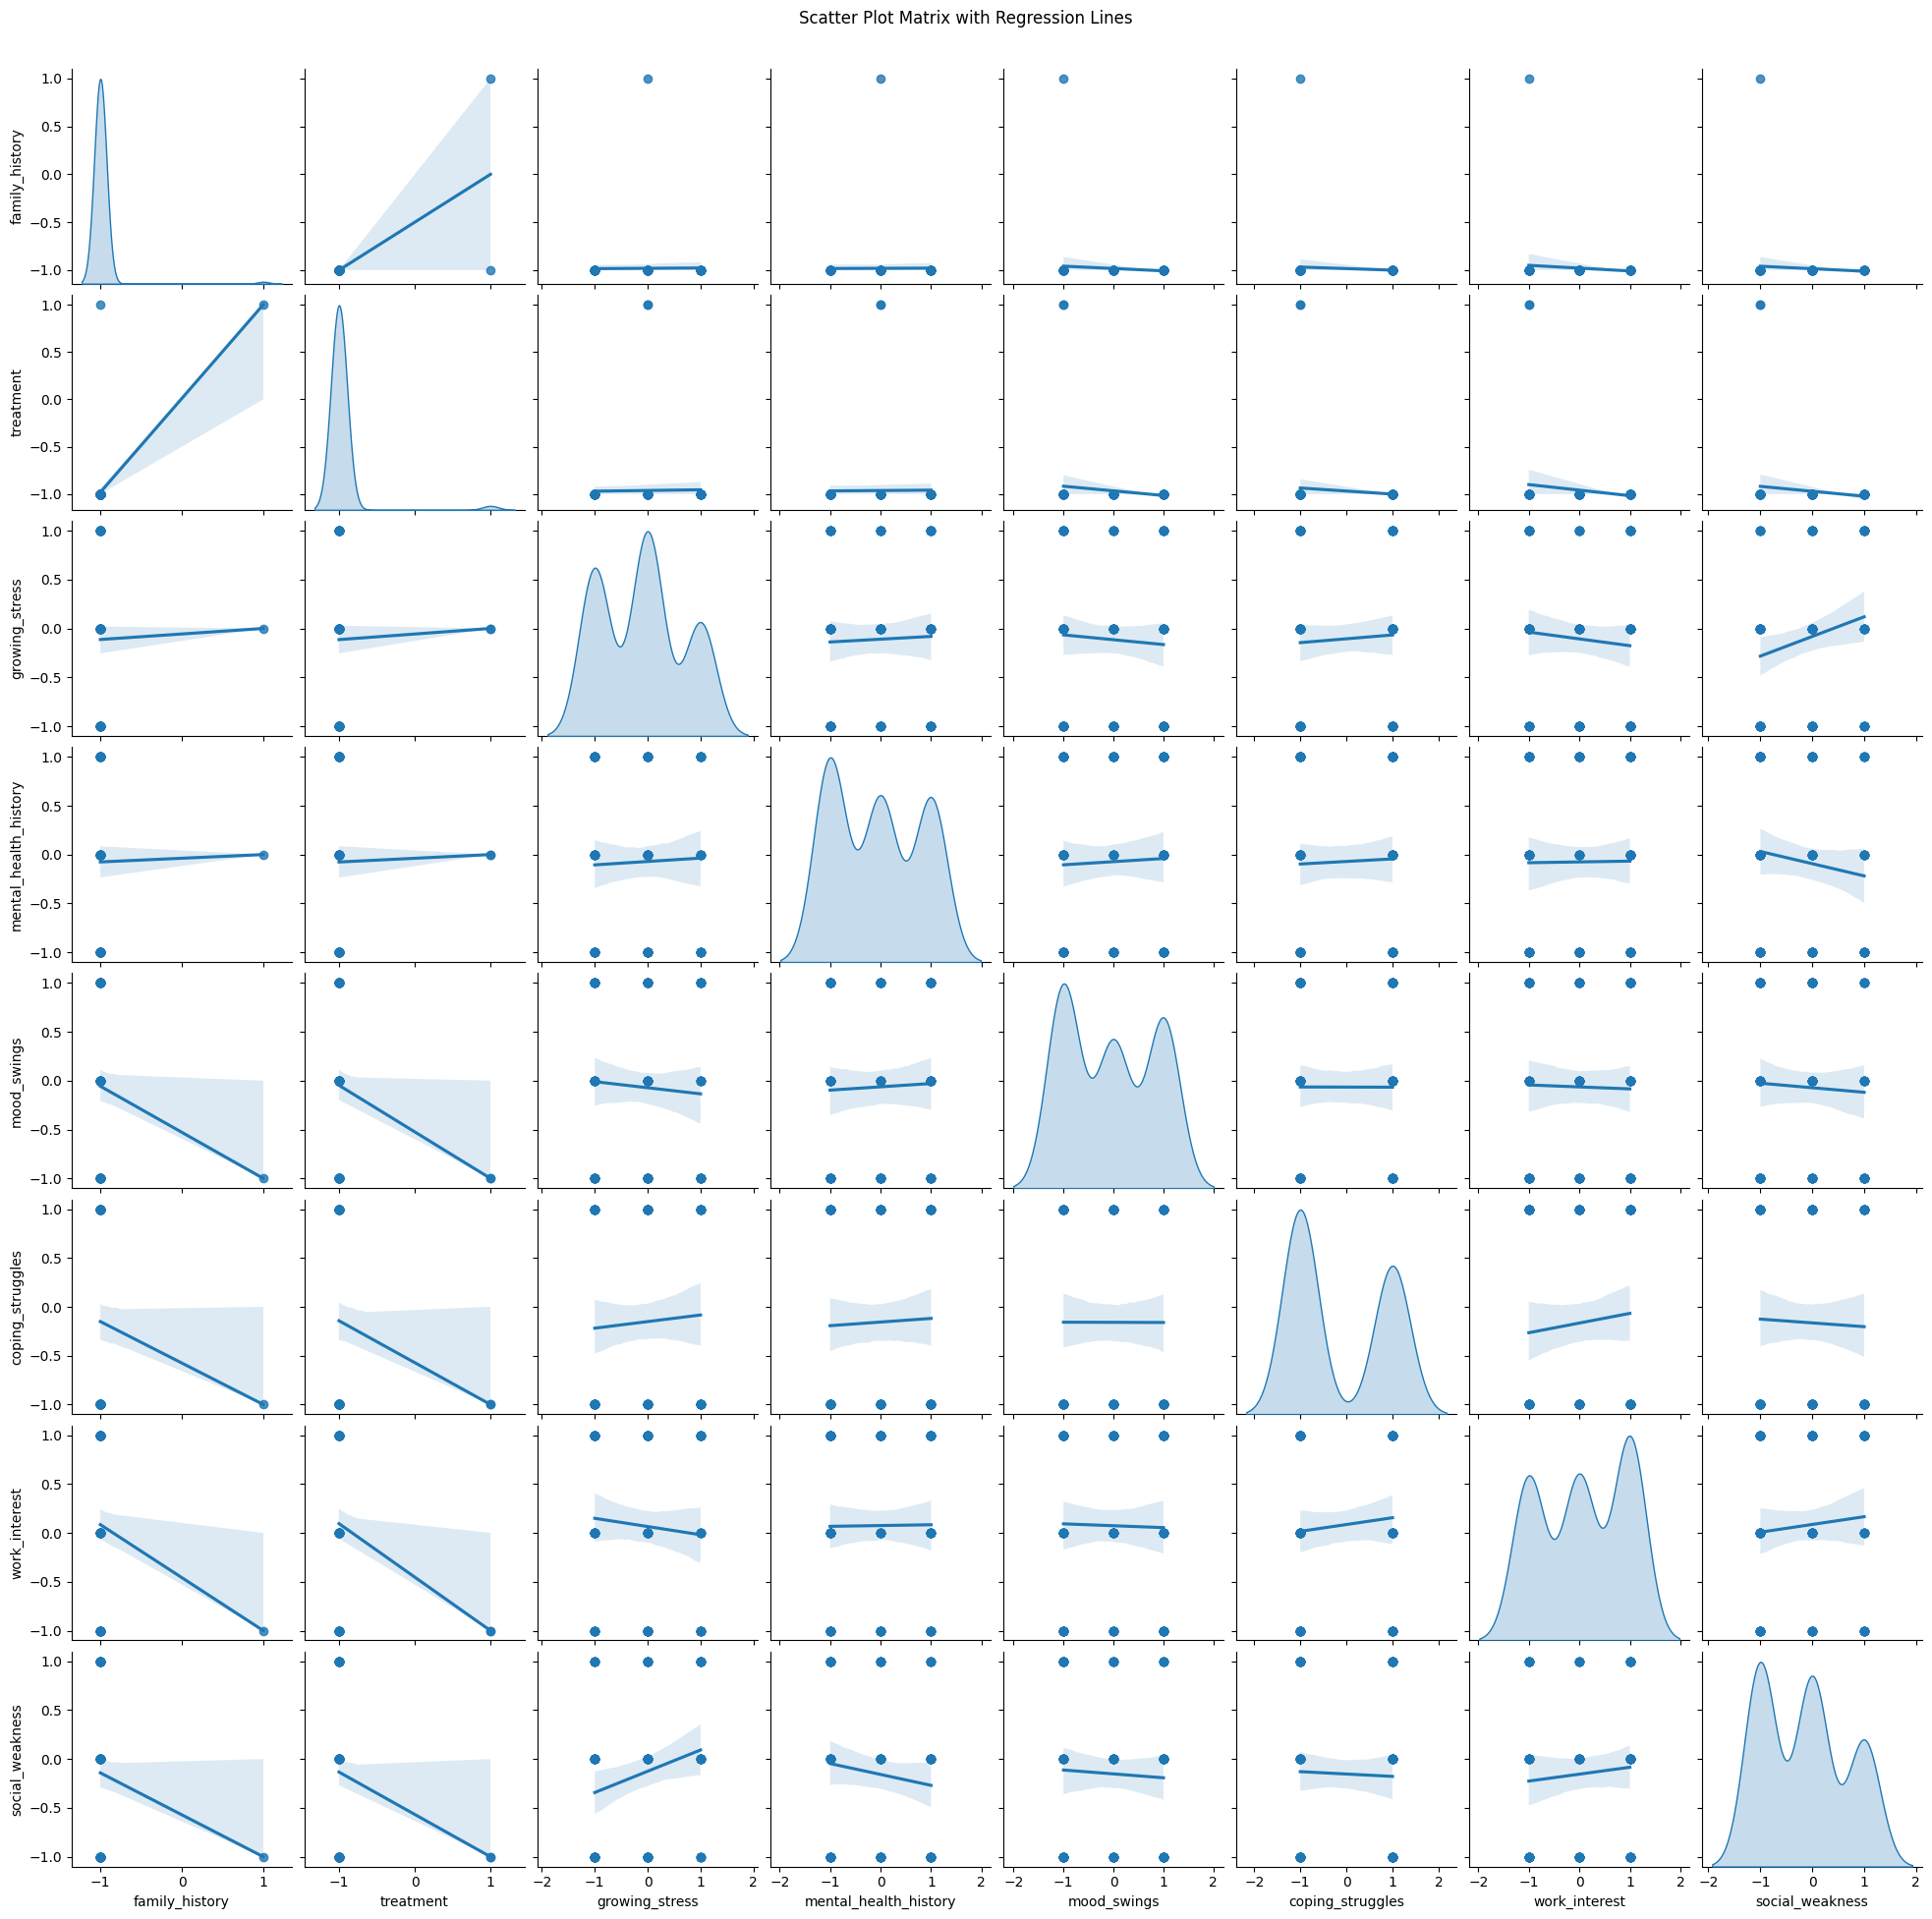

In [29]:
sns.pairplot(df_cor, kind='reg', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix with Regression Lines')
plt.subplots_adjust(top=0.95)
plt.show()

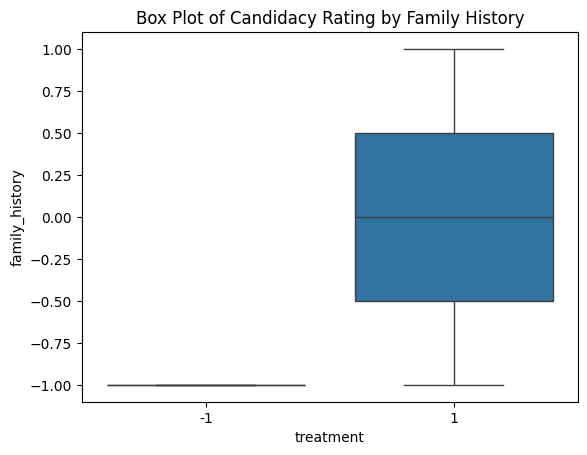

In [35]:
sns.boxplot(data=df_main, x='treatment', y='family_history')
plt.title('Box Plot of Candidacy Rating by Family History')
plt.show()

In [38]:

print(correlation_matrix['family_history'])

family_history           1.000000
treatment                0.703763
growing_stress           0.014468
mental_health_history    0.008768
mood_swings             -0.107326
coping_struggles        -0.082748
work_interest           -0.126037
social_weakness         -0.105492
Name: family_history, dtype: float64


In [ ]:

# #mental health unique
# df_mh_factor['mental_health_factor'].unique()
# print(df_mh_factor['work_interest'].unique())


# #bar plot for mental_health_factor
# plt.figure(figsize=(10, 6))
# sns.barplot(x='work_interest', y='mental_health_factor', data=df_mh_factor)
# plt.title('Factor vs. Work Interest')
# plt.show()


# # Example: Box plot for 'growing_stress' based on 'family_history'
# sns.boxplot(x='work_interest', y='mental_health_factor', data=df_main)
# plt.title('Factor vs. Family History')
# plt.show()

In [ ]:
# # Specify the columns you want to include in the correlation matrix
# columns_of_interest = ['coping_struggles', 'work_interest', 'family_history', 'growing_stress']

# # Create a correlation matrix with the specified columns
# correlation_matrix = df_main[columns_of_interest].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heat Map (Selected Columns)')
# plt.show()

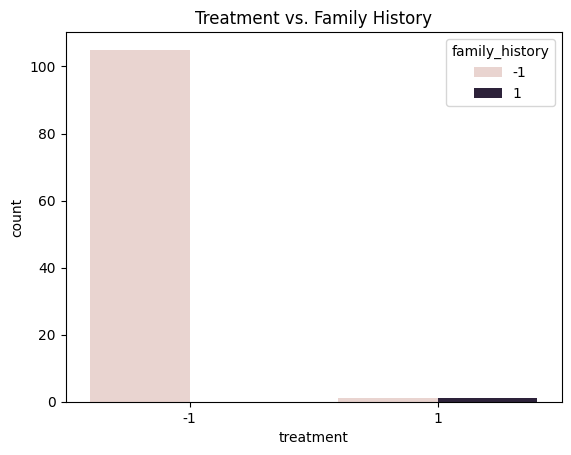

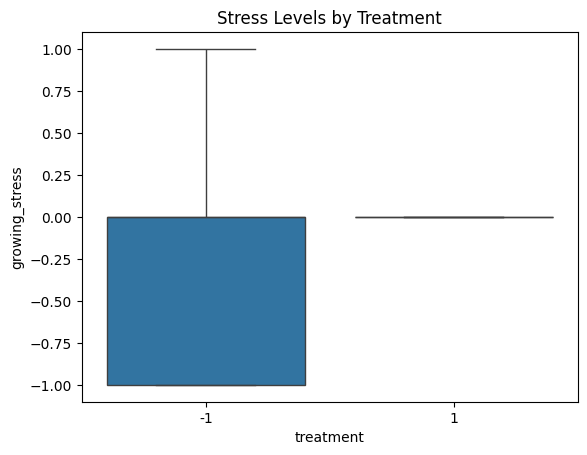

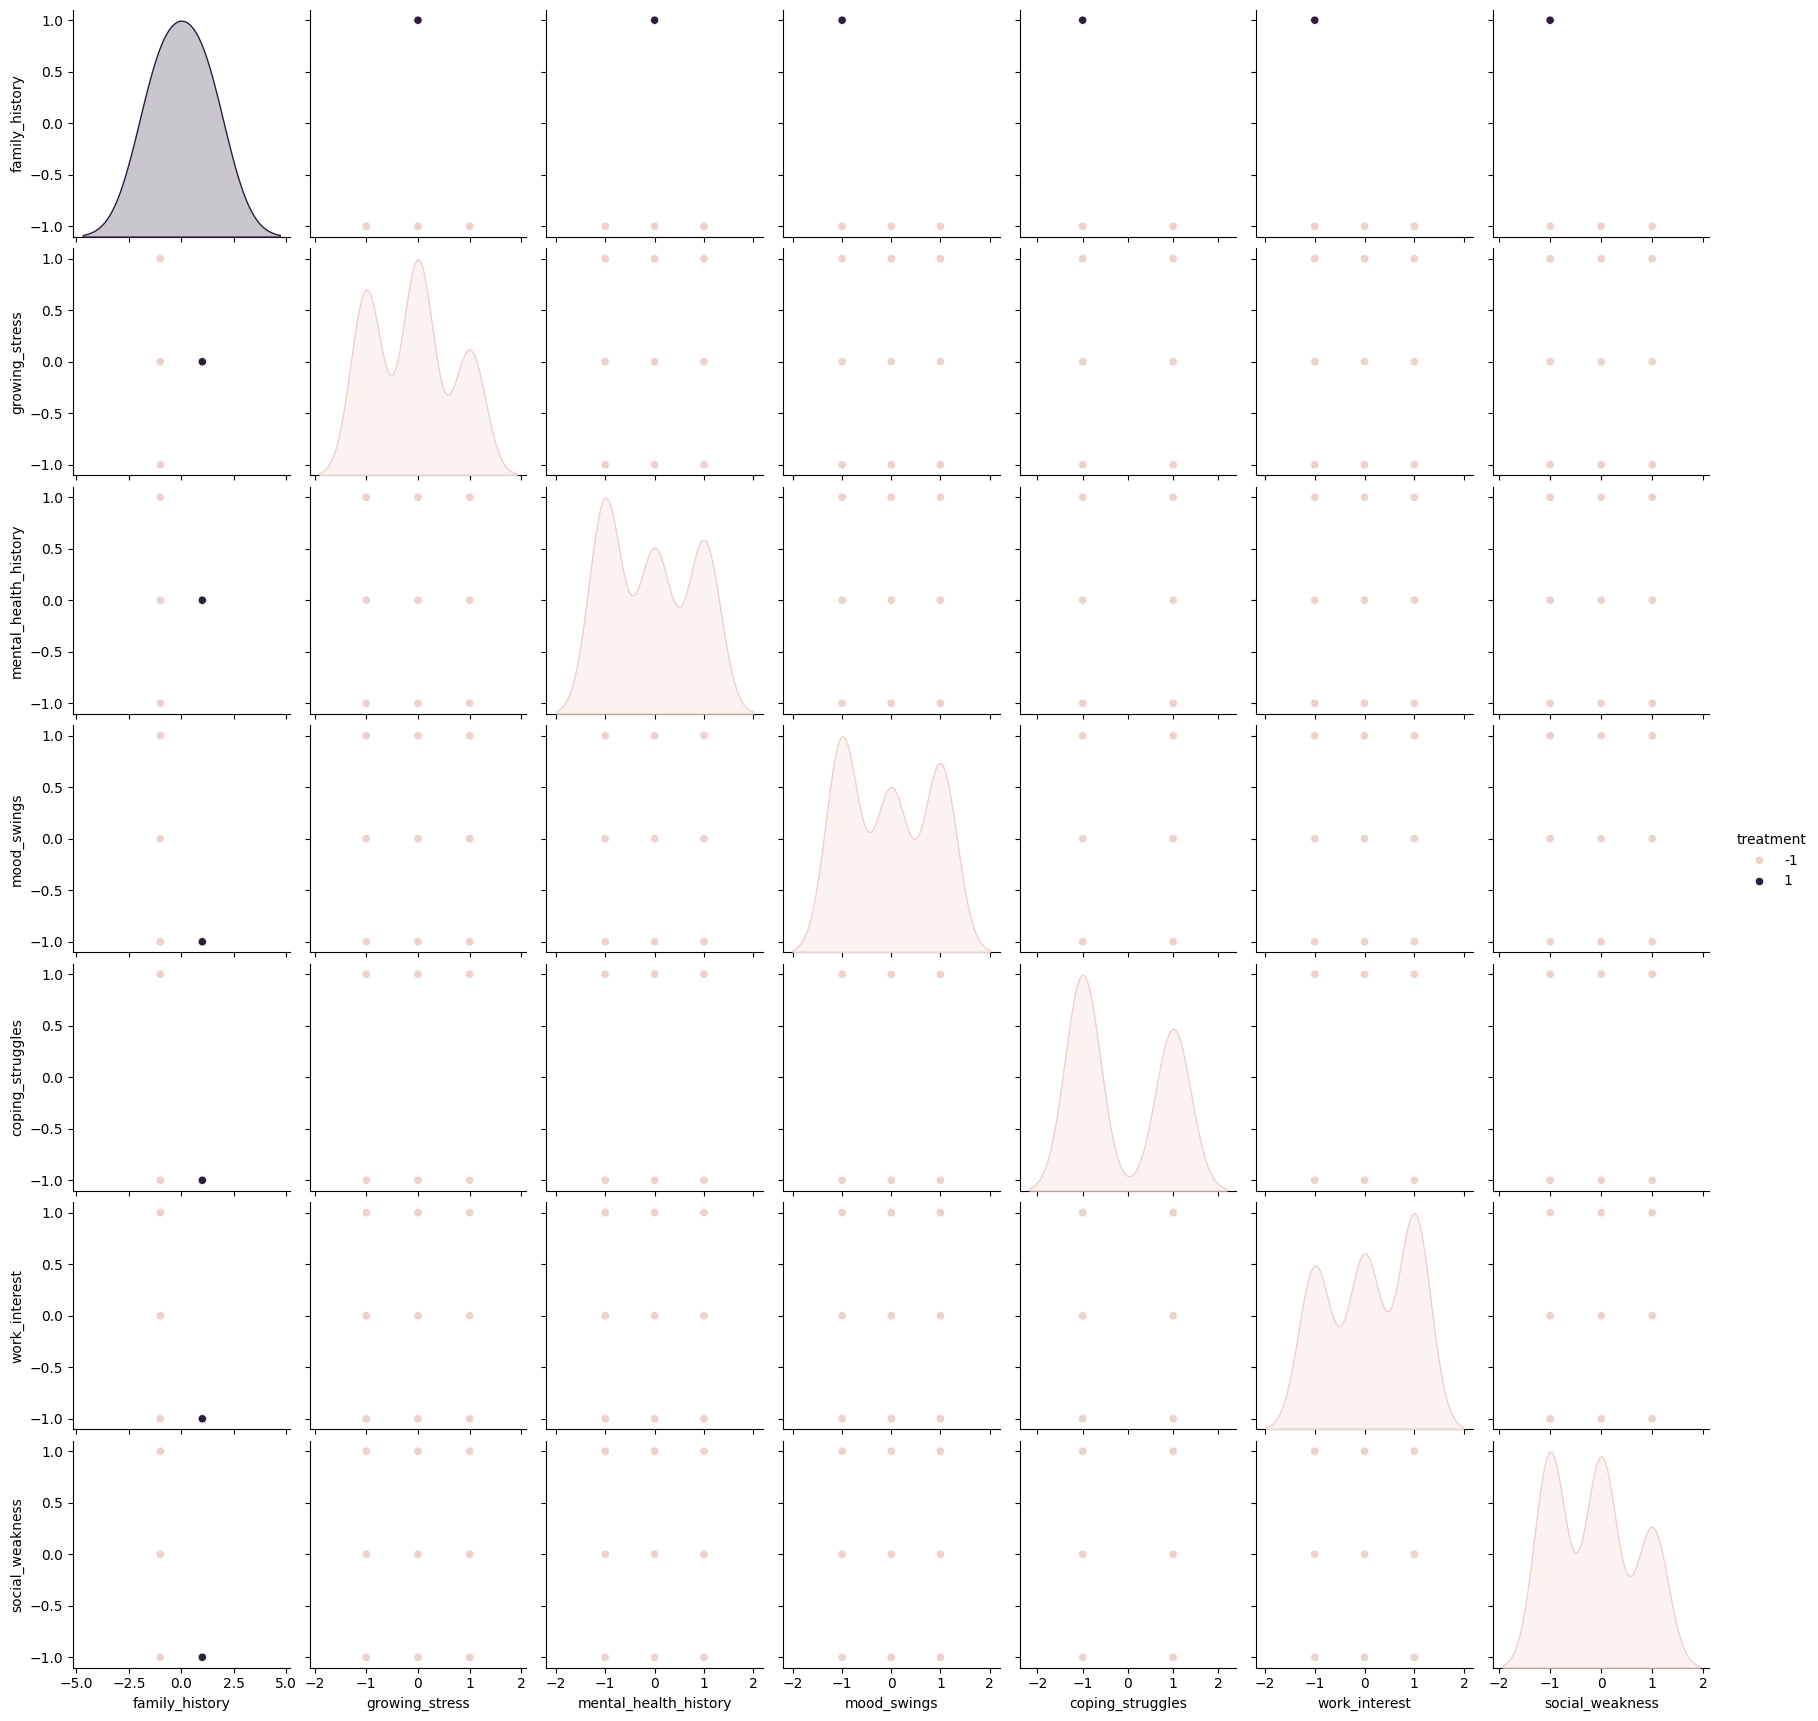

In [42]:
# Bar plot of gender vs. family history
sns.countplot(x='treatment', hue='family_history', data=df_cor)
plt.title('Treatment vs. Family History')
plt.show()

# Box plot of stress levels by gender
sns.boxplot(x='treatment', y='growing_stress', data=df_cor)
plt.title('Stress Levels by Treatment')
plt.show()

# Pair plot
sns.pairplot(df_cor, hue='treatment')
plt.show()

In [ ]:
df_main.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,mental_health_severity,candidacy_rating
0,0,United States,Corporate,No,1,1,1-14 days,1,-1,1,0,-1,1,1,Maybe,Yes,1,3
1,0,United States,Corporate,No,1,1,1-14 days,1,-1,1,0,-1,1,1,No,Yes,1,3
2,0,Poland,Corporate,No,-1,1,1-14 days,1,-1,1,0,-1,1,1,Maybe,Not sure,1,1
3,0,Australia,Corporate,No,1,1,1-14 days,1,-1,1,0,-1,1,1,No,Not sure,1,3
4,0,United States,Corporate,No,-1,-1,1-14 days,1,-1,1,0,-1,1,1,No,No,1,-1


In [ ]:
data = df_main.copy

# Group by all columns and count the occurrences
counts = data.groupby(list(data.columns)).size().reset_index(name='count')

# Display the result
print(counts)

AttributeError: 'function' object has no attribute 'groupby'